Testing the library

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%matplotlib inline
import aggregate
import matplotlib.pyplot as plt
import datacube
datacube.config.LocalConfig.db_database = 'wofstest'
datacube.config.LocalConfig.db_hostname = 'agdcstaging-db'
dc = datacube.Datacube()

In [3]:
lon = 143.83756, 143.88605
lat = -30.55194, -30.59073
stack = dc.load(product='wofs_albers', lat=lat, lon=lon)

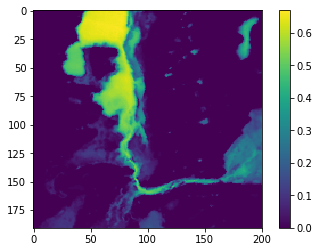

In [4]:
time, water = aggregate.WofsMask().prefilter(stack.time.data, stack.water.data)
f = plt.figure()
plt.imshow(water.mean(axis=0))
plt.colorbar()
None

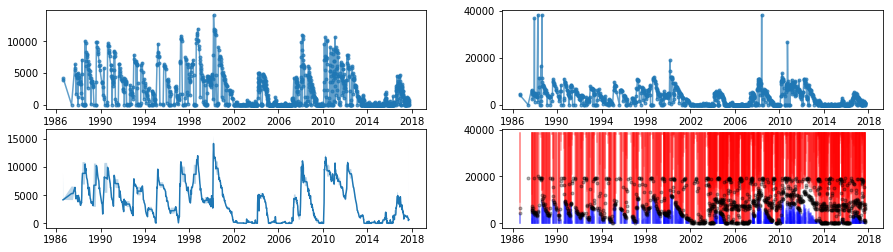

In [5]:
def fourplot(stack):
    timerange = stack.time.data[[0,-1]]
    fig, axes = plt.subplots(2,2)
    axes = axes.ravel()
    aggregate.Naive()(stack.water).lineplot(axes=axes[0])
    aggregate.Broken()(stack.water).lineplot(axes=axes[1])
    #aggregate.Bracket(timerange)(stack.water).envelopeplot(axes=axes[2])
    aggregate.Bracket()(stack.water).envelopeplot(axes=axes[2])
    aggregate.Conservative()(stack.water).discreteplot(axes=axes[3])
    fig.set_figwidth(15)
fourplot(stack)

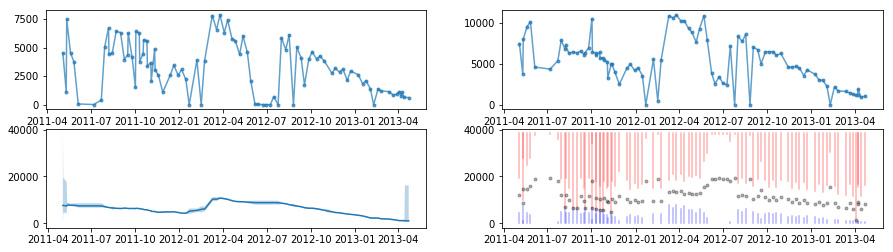

In [6]:
subset = stack.isel(time=slice(1150,1250))
fourplot(subset)

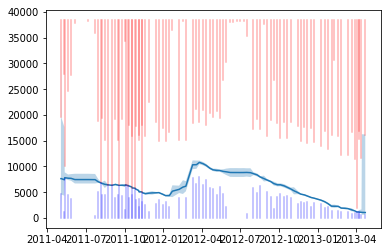

In [7]:
aggregate.Bracket()(subset.water).envelopeplot()
aggregate.Conservative()(subset.water).discreteplot(marker=None)